In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display

In [2]:
#URL for raw csv data
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/D3.csv'

df = pd.read_csv(url)

In [3]:
# Separate features and labels
x =  df.values[:, :3] # get input values from all explainatory variables
Y =  df.values[:, 3] # get output values from fourth column -- Y is the list here

m = len(Y) # Number of training examples

x_0 = np.ones((m,1))
X = np.hstack((x_0, x))
theta = np.zeros(4)

Define Cost Function Algorithm

In [4]:
def compute_cost(X, Y, theta):
  predictions = X.dot(theta)
  errors = np.subtract(predictions, Y)

  J = 1 / (2 * m) * np.sum(np.square(errors))
  return J

In [5]:
def gradient_descent(X,Y,theta,alpha,iterations):
  cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, Y)
    sum_delta = (1 / m) * X.transpose().dot(errors)

    theta = theta - (alpha * sum_delta)

    cost_history[i] = compute_cost(X,Y,theta)

  return theta, cost_history

In [6]:
iterations = 1500

alpha = 0.1
theta1, cost_history_1 = gradient_descent(X, Y, theta, alpha, iterations)

alpha2 = 0.055
theta2, cost_history_2 = gradient_descent(X, Y, theta, alpha2, iterations)

alpha3 = 0.01
theta3, cost_history_3 = gradient_descent(X, Y, theta, alpha3, iterations)

print('Linear Model for all variables: h(x) =')
print(theta1[0], '* x_0 +', theta1[1], '* x_1 +', theta1[2], '* x_2 +', theta1[3], '* x_3')

print('\nFinal cost:', cost_history_1[iterations-1])

Linear Model for all variables: h(x) =
5.31416562749957 * x_0 + -2.003719050517275 * x_1 + 0.5325635914250081 * x_2 + -0.2656016390618418 * x_3

Final cost: 0.7384642415684215


In [7]:
def predict_func(X, theta):
  predicted_val = theta[0] + theta[1]*X[0] + theta[2]*X[1] + theta[3]*X[2]
  return predicted_val

In [8]:
# Predict the value of y for new (X1, X2, X3) values
newX1 = [1, 1, 1]
print('\nGiven X:', newX1, 'The predicted value of Y:', predict_func(newX1, theta1))
newX2 = [2, 0, 4]
print('Given X:', newX2, 'The predicted value of Y:', predict_func(newX2, theta1))
newX3 = [3, 2, 1]
print('Given X:', newX3, 'The predicted value of Y:', predict_func(newX3, theta1))



Given X: [1, 1, 1] The predicted value of Y: 3.577408529345461
Given X: [2, 0, 4] The predicted value of Y: 0.2443209702176523
Given X: [3, 2, 1] The predicted value of Y: 0.10253401973591886


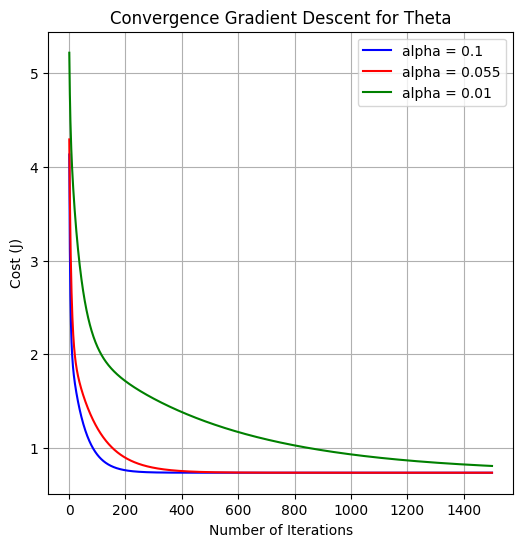

In [10]:
# Gradient Descent Plot
Iterations = range(1, iterations+1)

# Gradient Descent Plot with different learning rates
plt.plot(range(1, iterations+1), cost_history_1, color='blue', label='alpha = 0.1')
plt.plot(range(1, iterations+1), cost_history_2, color='red', label='alpha = 0.055')
plt.plot(range(1, iterations+1), cost_history_3, color='green', label='alpha = 0.01')


plt.grid(True)
plt.legend()
plt.title('Convergence Gradient Descent for Theta')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.rcParams["figure.figsize"] = (6,6)

plt.show()